In [3]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import neattext.functions as nfx

In [5]:
pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 114 kB 7.4 MB/s 


In [7]:
df = pd.read_csv("/content/Emotion_final.csv")

In [8]:
df.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [11]:
df.shape

(21459, 2)

In [12]:
df.dtypes

Text       object
Emotion    object
dtype: object

In [16]:
df.isnull().sum()

Text       0
Emotion    0
dtype: int64

In [17]:
df['Emotion'].value_counts()

happy       7029
sadness     6265
anger       2993
fear        2652
love        1641
surprise     879
Name: Emotion, dtype: int64

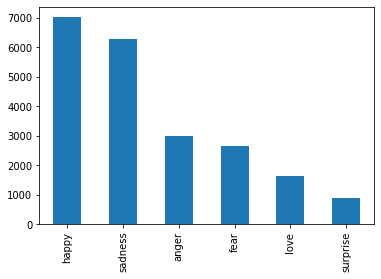

In [18]:
df['Emotion'].value_counts().plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


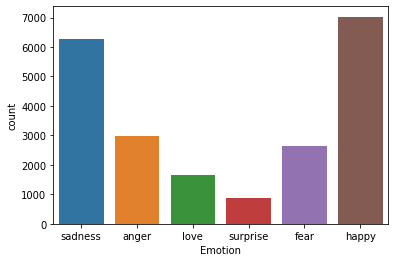

In [19]:
#usng seaborn (old method)
sns.countplot(df['Emotion'])

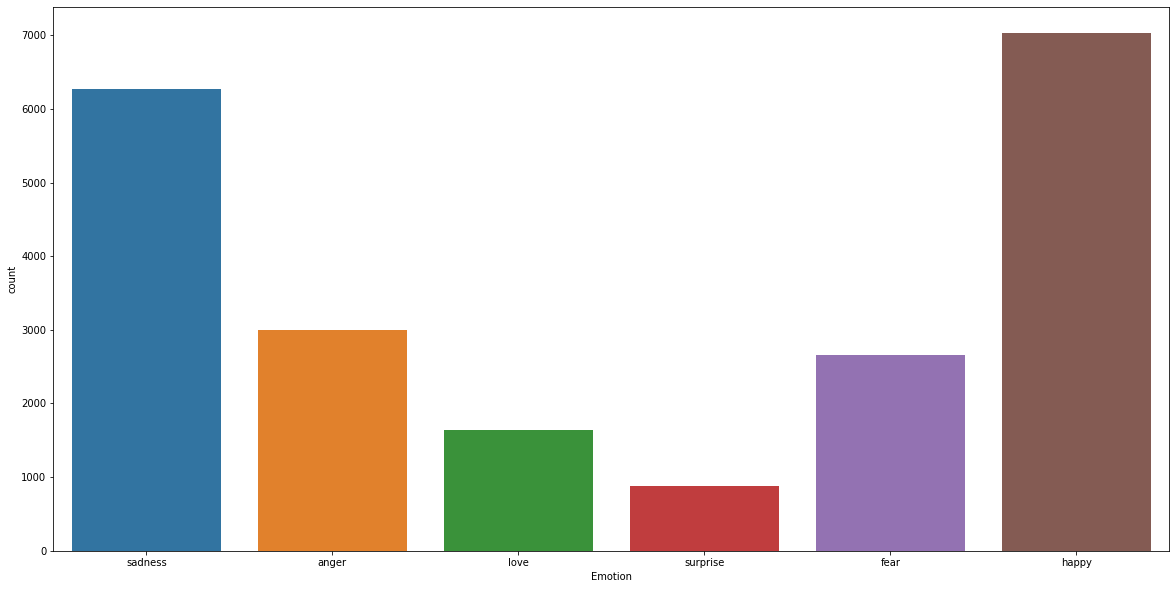

In [20]:
plt.figure(figsize=(20,10))
sns.countplot(x='Emotion',data=df)  #new method

In [21]:
#sentiment analysis
from textblob import TextBlob

In [22]:
def get_sentiment(text):
  blob = TextBlob(text)
  sentiment = blob.sentiment.polarity
  if sentiment>0:
    result="Positive"
  elif sentiment<0:
    result="Negative"
  else:
    result="Neutral"
  return result

the polarity of this sample review. Polarity ranges from -1 (most negative) to 1 (most positive).
sentiment = blob.sentiment --> Sentiment(polarity=-0.8, subjectivity=0.9)


In [23]:
get_sentiment("I love coding")

'Positive'

In [24]:
df['Sentiment'] = df['Text'].apply(get_sentiment)


In [25]:
df.head()

,Text,Emotion,Sentiment
0,i didnt feel humiliated,sadness,Neutral
1,i can go from feeling so hopeless to so damned...,sadness,Neutral
2,im grabbing a minute to post i feel greedy wrong,anger,Negative
3,i am ever feeling nostalgic about the fireplac...,love,Negative
4,i am feeling grouchy,anger,Neutral


In [26]:
#Compare our emoions vs sentiment
df.groupby(['Emotion','Sentiment']).size()

Emotion   Sentiment
anger     Negative     1390
          Neutral       806
          Positive      797
fear      Negative     1153
          Neutral       665
          Positive      834
happy     Negative      781
          Neutral      1035
          Positive     5213
love      Negative      318
          Neutral       234
          Positive     1089
sadness   Negative     2934
          Neutral      1592
          Positive     1739
surprise  Negative      329
          Neutral       152
          Positive      398
dtype: int64

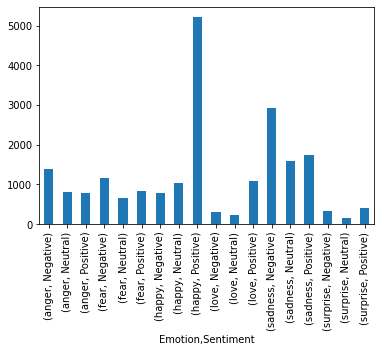

In [27]:
#1: using matplotlib
#Compare our emoions vs sentiment
df.groupby(['Emotion','Sentiment']).size().plot(kind='bar')

In [28]:
#uisng seaborn
sns.factorplot
sns.catplot

<function seaborn.categorical.catplot>

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


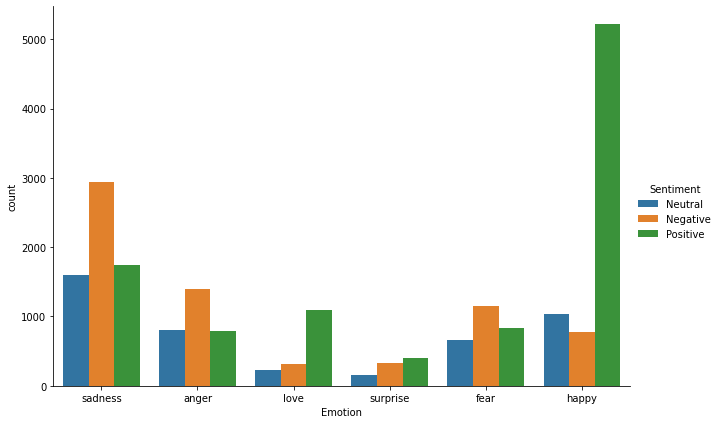

In [29]:
sns.factorplot(x='Emotion',hue='Sentiment',data=df,kind='count',size=6,aspect=1.5)

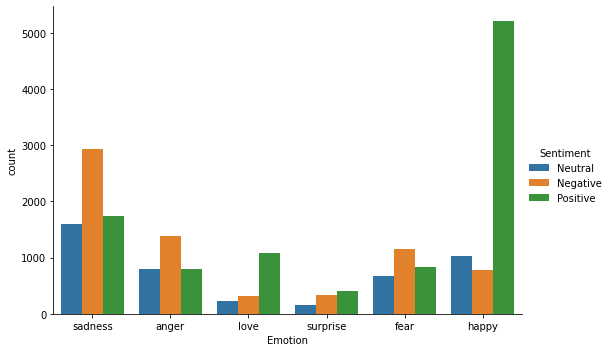

In [30]:
sns.catplot(x='Emotion',hue='Sentiment',data=df,kind='count',aspect=1.5)

In [31]:
dir(nfx)


['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

###Text Cleadning
+Remove Noise
  -stopwords
  -special characters
  -punctuations
  -emojis

In [32]:
df['Clean_Text']=df['Text'].apply(nfx.remove_stopwords)

In [33]:
df['Clean_Text']=df['Text'].apply(nfx.remove_punctuations)

In [34]:
df['Clean_Text']=df['Text'].apply(nfx.remove_userhandles)

In [35]:
df[['Text','Clean_Text']]

,Text,Clean_Text
0,i didnt feel humiliated,i didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,i can go from feeling so hopeless to so damned...
2,im grabbing a minute to post i feel greedy wrong,im grabbing a minute to post i feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,i am ever feeling nostalgic about the fireplac...
4,i am feeling grouchy,i am feeling grouchy
...,...,...
21454,Melissa stared at her friend in dism,Melissa stared at her friend in dism
21455,Successive state elections have seen the gover...,Successive state elections have seen the gover...
21456,Vincent was irritated but not dismay,Vincent was irritated but not dismay
21457,Kendall-Hume turned back to face the dismayed ...,Kendall-Hume turned back to face the dismayed ...


In [ ]:
#Keyword Extraction
#extract most common words as per emotion

In [36]:
from collections import Counter

In [37]:
def extract_keywords(text,num=50):
  tokens = [tok for tok in text.split()]
  most_common_tokens = Counter(tokens).most_common(num)
  return dict(most_common_tokens)

In [38]:
#list of emotion
emotion_list = df['Emotion'].unique().tolist()

In [39]:
emotion_list

['sadness', 'anger', 'love', 'surprise', 'fear', 'happy']

In [40]:
# happy_list =df[df['Emotion'] == 'happy']['Clean_Text'].tolist()
happy_list = df[df['Emotion'] == 'happy']['Clean_Text'].tolist()

In [41]:
happy_docx = ' '.join(happy_list)

In [42]:
happy_docx

'i have been with petronas for years i feel that petronas has performed well and made a huge profit i do feel that running is a divine experience and that i can expect to have some type of spiritual encounter i have immense sympathy with the general point but as a possible proto writer trying to find time to write in the corners of life and with no sign of an agent let alone a publishing contract this feels a little precious i do not feel reassured anxiety is on each side i have the feeling she was amused and delighted i was able to help chai lifeline with your support and encouragement is a great feeling and i am so glad you were able to help me i feel more superior dead chicken or grieving child i get giddy over feeling elegant in a perfectly fitted pencil skirt i can t imagine a real life scenario where i would be emotionally connected enough with someone to feel totally accepted and safe where it it morally acceptable for me to have close and prolonged physical contact and where se

In [43]:
#Extract keywords
keyword_happy = extract_keywords(happy_docx)

In [44]:
keyword_happy

{'a': 2814,
 'about': 712,
 'all': 465,
 'am': 940,
 'and': 4267,
 'are': 452,
 'as': 770,
 'at': 581,
 'be': 910,
 'because': 399,
 'but': 881,
 'can': 434,
 'do': 439,
 'feel': 4948,
 'feeling': 1956,
 'for': 1039,
 'have': 1086,
 'i': 10728,
 'if': 361,
 'im': 1007,
 'in': 1629,
 'is': 1089,
 'it': 1338,
 'just': 555,
 'like': 1266,
 'me': 944,
 'more': 693,
 'my': 1746,
 'not': 811,
 'now': 351,
 'of': 2158,
 'on': 734,
 'or': 487,
 'out': 361,
 'really': 381,
 'so': 1014,
 't': 350,
 'that': 2405,
 'the': 4013,
 'they': 352,
 'this': 932,
 'time': 370,
 'to': 4181,
 'very': 458,
 'was': 925,
 'what': 353,
 'when': 524,
 'will': 382,
 'with': 958,
 'you': 678}

In [45]:
def plot_most_common_words(mydict,emotion_name):
  df_01 = pd.DataFrame(mydict.items(),columns=['token','count'])
  plt.figure(figsize=(20,10))
  plt.title("plot of keyword {}".format(emotion_name))
  sns.barplot(x='token',y='count',data=df_01)
  plt.xticks(rotation=45)
  plt.show()


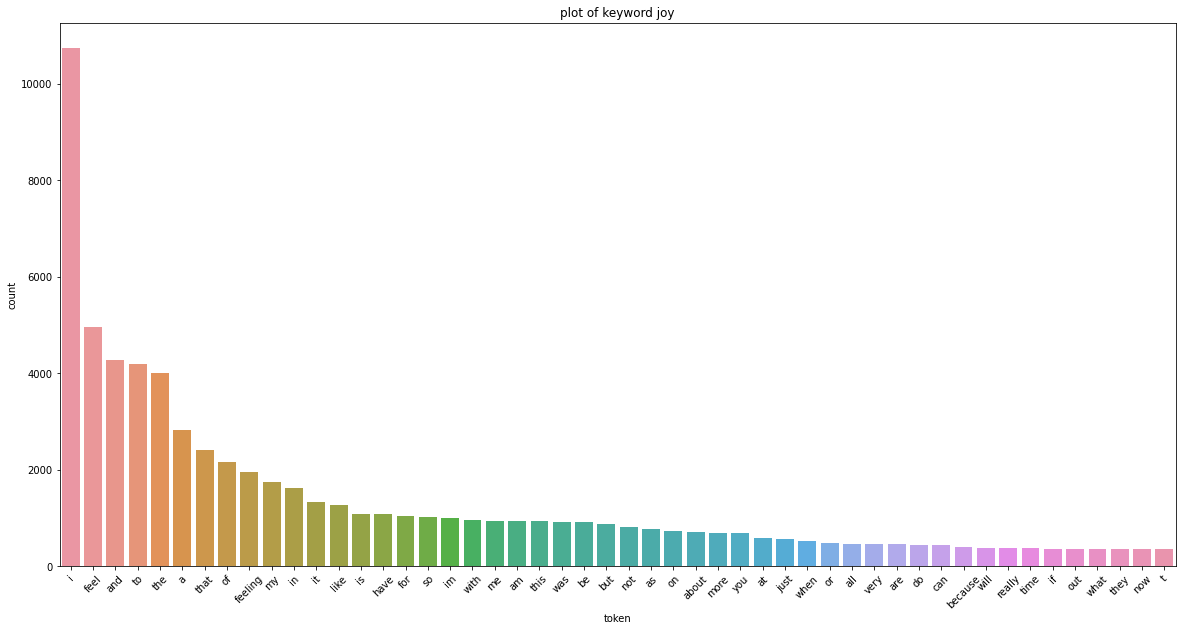

In [46]:
plot_most_common_words(keyword_happy,"joy")

In [47]:
surprise_list = df[df['Emotion'] == 'surprise']['Clean_Text'].tolist()
#doc
surprise_docx = ' '.join(surprise_list)
keyword_surprise = extract_keywords(surprise_docx)

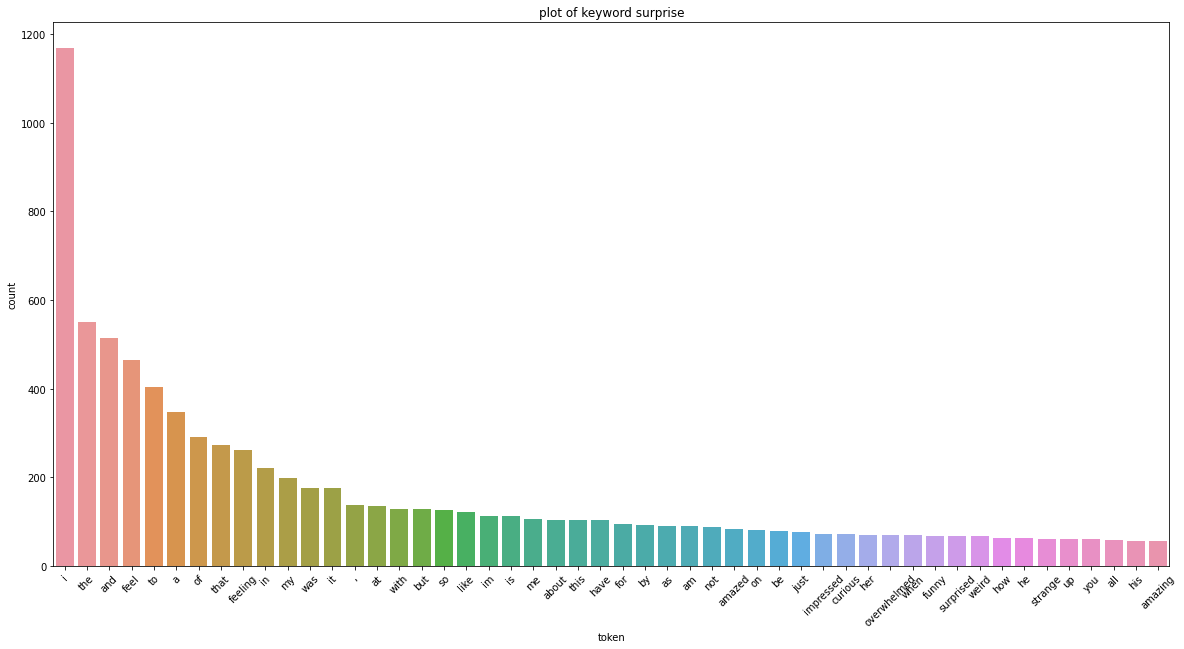

In [48]:
plot_most_common_words(keyword_surprise,"surprise")

In [49]:
#word cloud
from wordcloud import WordCloud

In [58]:
def plot_wordcloud(docx):
  mywordcloud = WordCloud().generate(docx)
  plt.figure(figsize=(20,10))
  plt.imshow(mywordcloud,interpolation='bilinear')
  plt.axis('off')
  plt.show()

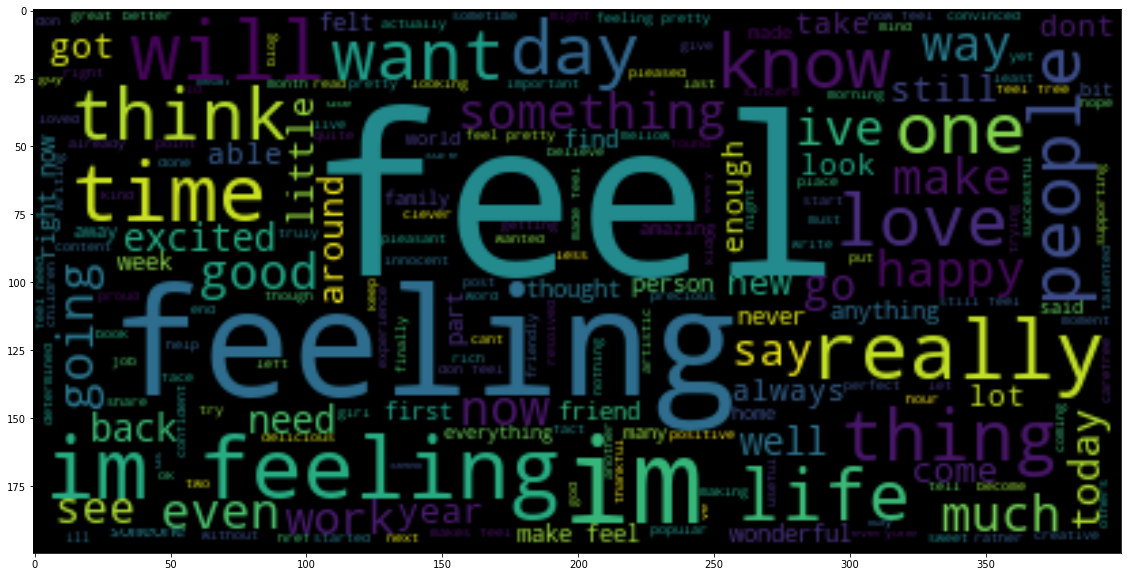

In [57]:
plot_wordcloud(happy_docx)

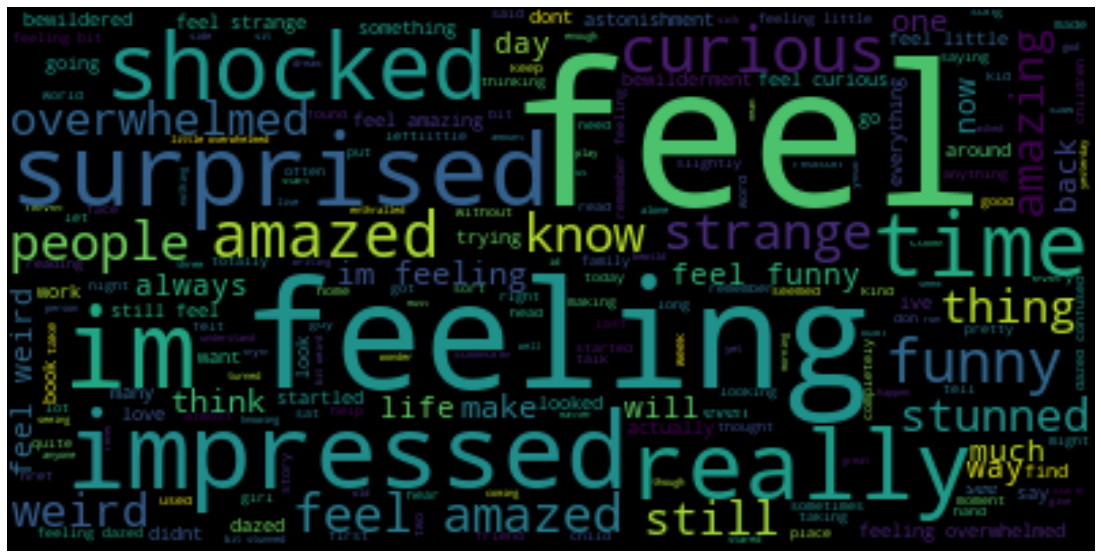

In [59]:
plot_wordcloud(surprise_docx)

In [ ]:
#machine learning

1. Naive Bayes
2. logistic reg
3. KNN
4. Decision Tree

compare with sparknlp/NLU john snows labs

In [61]:
pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [65]:
#load ml packgs
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
#vectorizater
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#Metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix


In [66]:
#split dataset
from sklearn.model_selection import train_test_split

In [67]:
#build features from text

In [80]:
Xfeatures = df['Clean_Text']
ylabels= df['Emotion']

In [69]:
Xfeatures

0                                  i didnt feel humiliated
1        i can go from feeling so hopeless to so damned...
2         im grabbing a minute to post i feel greedy wrong
3        i am ever feeling nostalgic about the fireplac...
4                                     i am feeling grouchy
                               ...                        
21454                 Melissa stared at her friend in dism
21455    Successive state elections have seen the gover...
21456                 Vincent was irritated but not dismay
21457    Kendall-Hume turned back to face the dismayed ...
21458                      I am dismayed , but not surpris
Name: Clean_Text, Length: 21459, dtype: object

In [88]:
#vectorizer
cv = CountVectorizer()
X=cv.fit_transform(Xfeatures)

In [76]:
X

<21459x19211 sparse matrix of type '<class 'numpy.int64'>'
	with 334038 stored elements in Compressed Sparse Row format>

In [ ]:
#get vectors
cv.get_feature_names()

In [78]:
#X.toarrays()

In [81]:
#Split dataset 
X_train,X_test,y_train,y_test = train_test_split(X,ylabels,test_size=0.3,random_state=42)

Bulid our model

In [82]:
nv_model = MultinomialNB()
nv_model.fit(X_train,y_train)

MultinomialNB()

In [83]:
#Accuracy
nv_model.score(X_test,y_test)

0.7298850574712644

In [85]:
#prediction
y_pred_for_nv = nv_model.predict(X_test)

In [86]:
y_pred_for_nv

array(['happy', 'anger', 'happy', ..., 'happy', 'happy', 'happy'],
      dtype='<U8')

In [87]:
#make a single preiction
#Vectorized our text
#Applied our model

In [89]:
sample_text = ["I love coding so much"]

In [93]:
vect= cv.transform(sample_text).toarray()

In [95]:
#make prediction
nv_model.predict(vect)

array(['happy'], dtype='<U8')

In [96]:
#check for the prediction probability(Percentage)/confidence score
#how good

nv_model.predict_proba(vect)

array([[0.05323626, 0.03873715, 0.51607847, 0.0496154 , 0.33899487,
        0.00333786]])

In [97]:
#get all class for our model
nv_model.classes_

array(['anger', 'fear', 'happy', 'love', 'sadness', 'surprise'],
      dtype='<U8')

In [98]:
np.max(nv_model.predict_proba(vect))

0.5160784657189795

In [110]:
def predict_emotion(sample_text,model):
  myvector = cv.transform(sample_text).toarray()
  prediction= model.predict(myvector)
#  nv_model.predict_proba(myvector)
#  pred_proba = np.max(model.predict_proba(myvector))
  pred_proba = model.predict_proba(myvector)
  pred_percentage_for_all = dict(zip(model.classes_,pred_proba[0]))
  print("Prediction: {}, Prediction Score: {}".format(prediction[0],np.max(pred_proba)))
  print(prediction[0])
  return pred_percentage_for_all
  

In [111]:
predict_emotion(sample_text,nv_model)

Prediction: happy, Prediction Score: 0.5160784657189795
happy


{'anger': 0.053236256038488076,
 'fear': 0.038737145103282467,
 'happy': 0.5160784657189795,
 'love': 0.049615397786144794,
 'sadness': 0.338994874453068,
 'surprise': 0.0033378609000355723}

In [112]:
predict_emotion(["He hates running all day"],nv_model)

Prediction: sadness, Prediction Score: 0.5424024158244545
sadness


{'anger': 0.06566820572400467,
 'fear': 0.05770448773927188,
 'happy': 0.29371208177707825,
 'love': 0.03763463198882054,
 'sadness': 0.5424024158244545,
 'surprise': 0.002878176946368609}

In [113]:
#model Eval

print(classification_report(y_test,y_pred_for_nv))

              precision    recall  f1-score   support

       anger       0.91      0.52      0.67       909
        fear       0.83      0.47      0.60       796
       happy       0.68      0.95      0.79      2059
        love       0.84      0.20      0.32       492
     sadness       0.72      0.92      0.81      1929
    surprise       0.80      0.08      0.14       253

    accuracy                           0.73      6438
   macro avg       0.80      0.52      0.55      6438
weighted avg       0.76      0.73      0.69      6438



In [114]:
confusion_matrix(y_test,y_pred_for_nv)

array([[ 477,   24,  176,    1,  230,    1],
       [  18,  371,  192,    2,  211,    2],
       [  11,    7, 1953,   10,   78,    0],
       [   3,    1,  303,   96,   89,    0],
       [  10,   15,  117,    3, 1782,    2],
       [   6,   31,  121,    2,   73,   20]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


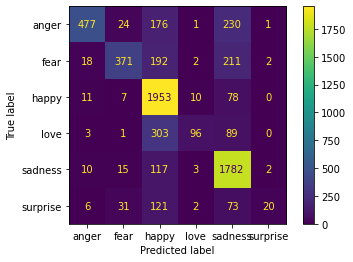

In [116]:
#plot confusionmatrix
plot_confusion_matrix(nv_model,X_test,y_test)

save model



In [120]:
import joblib

In [118]:
pip install joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [123]:
model_file = open("emotion_classifier_nv_model_29_july_2022.pkl","wb")
joblib.dump(nv_model,model_file)
model_file.close()

In [124]:
#Model interpretation
#Eli 5  lime  shap

In [125]:
#LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [126]:
#Accuracy
lr_model.score(X_test,y_test)

0.8895619757688723

In [127]:
#single predict
predict_emotion(sample_text,lr_model)

Prediction: happy, Prediction Score: 0.3520729443246528
happy


{'anger': 0.16704292964011483,
 'fear': 0.11177467859469663,
 'happy': 0.3520729443246528,
 'love': 0.033508977564761754,
 'sadness': 0.2863397712239694,
 'surprise': 0.049260698651804394}

In [129]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 7.6 MB/s 
     |████████████████████████████████| 133 kB 40.7 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=e7ef5427d2dc7e3615c8ce004458ba5c46dda3571337dd7671ddaa63c55fff76
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is inco

In [131]:
#interpret model
import eli5

In [ ]:
#show the weights for each class/label
eli5.show_weights(lr_model,top=20)

In [135]:
class_names = ylabels.unique().tolist()

In [136]:
feature_names=cv.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [139]:
eli5.show_weights(lr_model,feature_names=feature_names,target_names = class_names)

In [138]:
?eli5.show_weights